# Data Profile
This first examination of the data seeks to characterize data quality in its (near) raw form. Here, we will discover the scope and breadth of data preprocessing that will be considered before advancing to the exploratory analysis effort. The remainder of this section is organized as follows:

   1. Dataset Overview    
      1.0. Dataset Summary Statistics
      1.1. Dataset Columns Datatypes    
      1.2. Missing Data Analysis   
      1.3. Cardinality Analysis   

  
   2. Qualitative Variable Analysis   
      2.0. Descriptive Statistics     
      2.1. Frequency Distribution Analysis     
    
   3. Quantitative Variable Analysis       
      3.0. Descriptive Statistics     
      3.1. Distribution Analysis     
  
   4. Summary and Recommendations    

In [1]:
# IMPORTS
from myst_nb import glue
from cvr.core.workspace import Workspace, WorkspaceManager
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.width', 1000)

In [2]:
wsm = WorkspaceManager()
wsm.set_current_workspace('Vesuvio')

As a first step, let's get the current workspace which was set during the acquisition section.

In [3]:
wsm = WorkspaceManager()
workspace = wsm.get_current_workspace()
workspace.name

'Vesuvio'

The dataset created during the acquistion step was called 'criteo'. We can obtain this preprocessed version using the name='criteo' and stage='preprocessed'.

In [4]:
dataset  = workspace.get_dataset(name='criteo', stage='preprocessed')

## Dataset Overview
### Dataset Summary Statistics

In [5]:
summary = dataset.summary



                                Dataset Summary                                 
                              Criteo Preprocessed                               
                              ___________________                               
                                   Rows : 15,995,634
                                Columns : 23
                          Missing Cells : 167,746,417
                        Missing Cells % : 45.6
                         Duplicate Rows : 20,958
                       Duplicate Rows % : 0.13
                              Size (Mb) : 4,972.71


In [6]:
# GLUE
_ = glue("profile_rows",summary["Rows"], display=False)
_ = glue("profile_columns", summary["Columns"], display=False)
_ = glue("profile_missing", summary["Missing Cells %"], display=False)
_ = glue("profile_size", summary["Size (Mb)"], display=False)
_ = glue("profile_dups", summary["Duplicate Rows"], display=False)
_ = glue("profile_dup_pct", summary["Duplicate Rows %"], display=False)

This dataset contains some {glue:}`profile_rows` observations, each with {glue:}`profile_columns` columns for a size of {glue:}`profile_size` Mb.  Some {glue:}`profile_missing`% of the data are missing which reflects the sparsity of user behavior logs. Further, we have some {glue:}`profile_dups` duplicate rows which, one might consider a large number, although duplicate rows make up just {glue:}`profile_dup_pct`% of the sample.

### Dataset Columns and Datatypes

In [7]:
dataset.info()



                                 Dataset criteo                                 
                                 ______________                                 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15995634 entries, 0 to 15995633
Data columns (total 23 columns):
 #   Column                 Non-Null Count     Dtype   
---  ------                 --------------     -----   
 0   sale                   15995634 non-null  category
 1   sales_amount           1732721 non-null   float64 
 2   conversion_time_delay  1727341 non-null   float64 
 3   click_ts               15995634 non-null  float64 
 4   n_clicks_1week         9251207 non-null   float64 
 5   product_price          15995634 non-null  float64 
 6   product_age_group      4235576 non-null   category
 7   device_type            15992602 non-null  category
 8   audience_id            4493616 non-null   category
 9   product_gender         4341439 non-null   category
 10  product_brand          8754074 non-null   ca

Converting the pandas object variables to category data types may bring some computational efficiencies which may be material for a dataset of this size. Still, the number that stands out so far is the 45% missing rate. 
### Missing Values Analysis

In [8]:
_ = dataset.missing



                             Missing Data Analysis                              
                              Criteo Preprocessed                               
                             _____________________                              
                              n   Missing  Missingness
sale                   15995634         0         0.00
sales_amount           15995634  14262913        89.17
conversion_time_delay  15995634  14268293        89.20
click_ts               15995634         0         0.00
n_clicks_1week         15995634   6744427        42.16
product_price          15995634         0         0.00
product_age_group      15995634  11760058        73.52
device_type            15995634      3032         0.02
audience_id            15995634  11502018        71.91
product_gender         15995634  11654195        72.86
product_brand          15995634   7241560        45.27
product_category_1     15995634   6142756        38.40
product_category_2     15995634   615124

Here, we get a better sense of the nature of the data sparsity challenge. Nine columns have missing rates over 50%; five of which have missing rates of 90% or more. Notably, the diversity and data sparsity reflects the nature of buying behavior and are common challenges in customer segmentation and analytics. 

Still, the sparsity (and masking) of the data leaves us with few meaningful imputation strategies. One might replace the term 'missing' with 'absent'. Missing implies an error or omission in the data which may not comport with their underlying pattern. 

### Cardinality Analysis
Let's get an overall sense of cardinality of the data. One would expect high cardinality among users and very low cardinality on items.

In [9]:
_ = dataset.cardinality



                                  Cardinality                                   
                              Criteo Preprocessed                               
                              ___________________                               
                   Column    Unique     Total  Pct Unique
0                    sale         2  15995634        0.00
1            sales_amount    513406   1732721       29.63
2   conversion_time_delay    574347   1727341       33.25
3                click_ts   6456934  15995634       40.37
4          n_clicks_1week      4613   9251207        0.05
5           product_price     43143  15995634        0.27
6       product_age_group        11   4235576        0.00
7             device_type         8  15992602        0.00
8             audience_id     18228   4493616        0.41
9          product_gender        17   4341439        0.00
10          product_brand     55983   8754074        0.64
11     product_category_1        21   9852878        0.00
1

As expected, high cardinality among users and very low cardinality among device types, audiences, products, and their categories. Yet, converting some of these product categories into high-dimensional binary vectors for modeling may require some pruning. One strategy is to keep data for the most frequent product categories up to some percentage threshold of the data. We'll experiment with this technique during data preparation.

With this overview, let's dive deeper with a qualitative variable analysis.

## Qualitative Variable Analysis
Our qualitative or categorical variables include:
 - sale     
 - product_age_group    
 - device_type  
 - audience_id    
 - product_gender   
 - product_brand    
 - product_category_1 thru 7
 - product_country   
 - product_id
 - partner_id
 - user_id

 The product_title variable is treated as a object or string. 
 
 Descriptive statistics for the frequencies provide a sense of the categorical frequency distributions in the dataset. 

In [10]:
freq_dist = dataset.frequency_statistics
freq_dist.style.format(precision=2, thousands=",")

,count,mean,std,min,25%,50%,75%,max
0,18.00,"900,305.61","3,223,186.05",2.00,18.00,262.50,"14,059.00","13,708,490.00"


In [11]:
# GLUE
_ = glue("freq_stats",freq_dist)

,count,mean,std,min,25%,50%,75%,max
0,18.00,"900,305.61","3,223,186.05",2.00,18.00,262.50,"14,059.00","13,708,490.00"


There are {glue:}`freq_stats`['count'].values[0] categorical columns with an average of {glue:}`freq_stats`['mean'].values[0] categories emphasing our call for pruning observations from the least frequent categories.  
### Sale




                              Frequency Analysis:                               
                                      sale                                      
                              ____________________                              


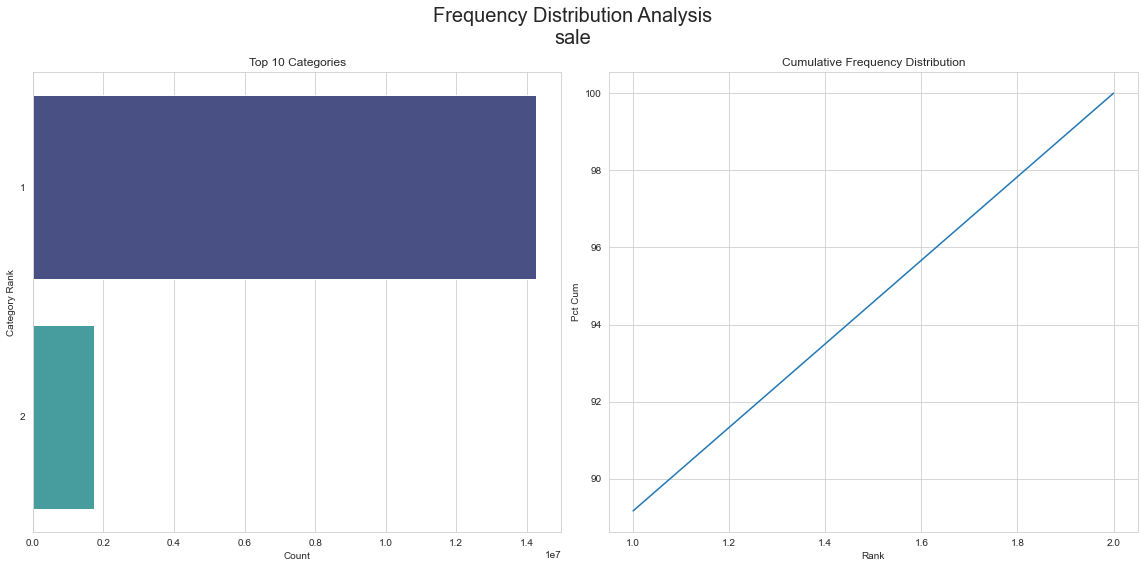

In [12]:
dataset.frequency_analysis(column='sale')

Note that the plot on the left shows frequency by rank and not by value. So, the top ranked value for sale has the highest frequency. The top ranked value happens to be 0. Showing ranks instead of values avoids excessively long hashed category values which cannot be intepreted. The plot on the right shows that we get nearly 85% of the data with the top ranked value of zero. Conversion rate in this case would be approximately 15%.
### Product Age Group



                              Frequency Analysis:                               
                               product_age_group                                
                              ____________________                              


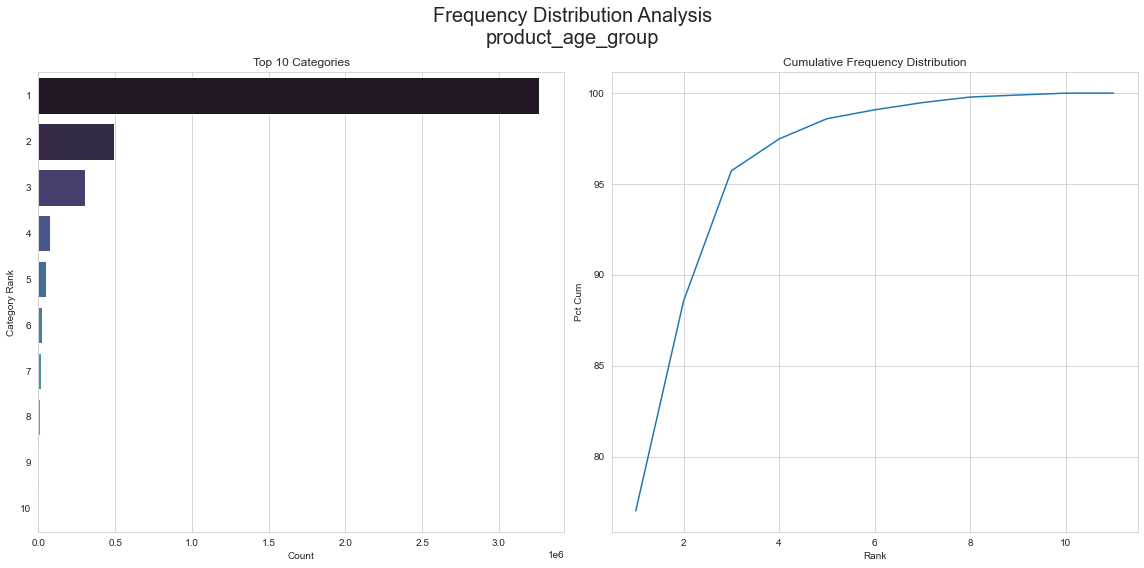

In [13]:
dataset.frequency_analysis(column='product_age_group')

Here we have the top 10 ranked categories for product_age_group. From Cumulative Frequency Distribution plot on the right, we get nearly 90% of the data with just 3 categories.
### Device Type



                              Frequency Analysis:                               
                                  device_type                                   
                              ____________________                              


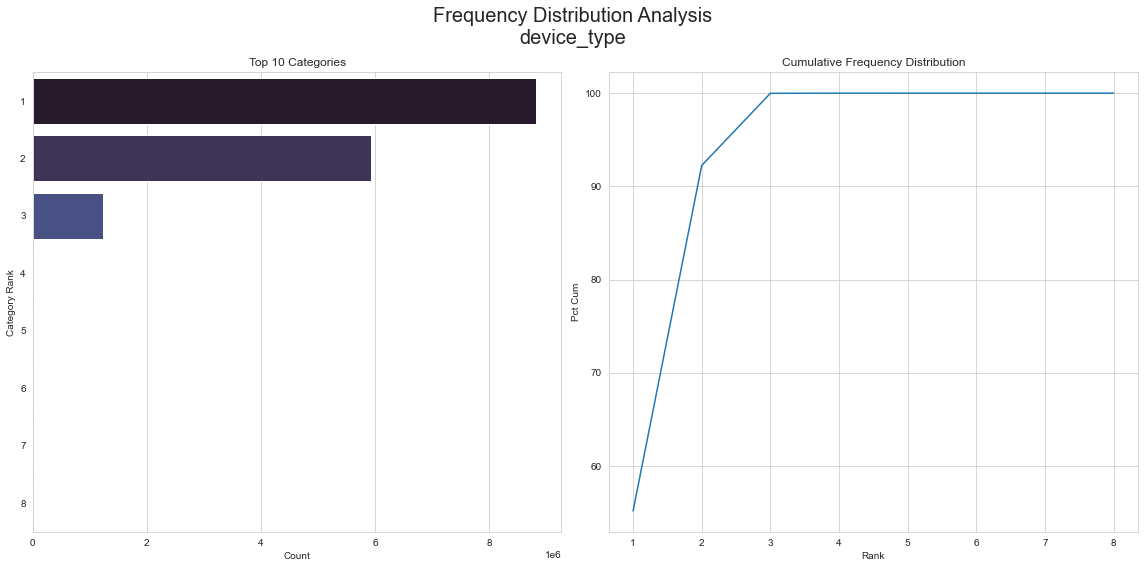

In [14]:
dataset.frequency_analysis(column='device_type')

Of the 8 datatypes we get over 90% of the data from 2 device types and nearly all the data from 3.  
### Audience Id



                              Frequency Analysis:                               
                                  audience_id                                   
                              ____________________                              


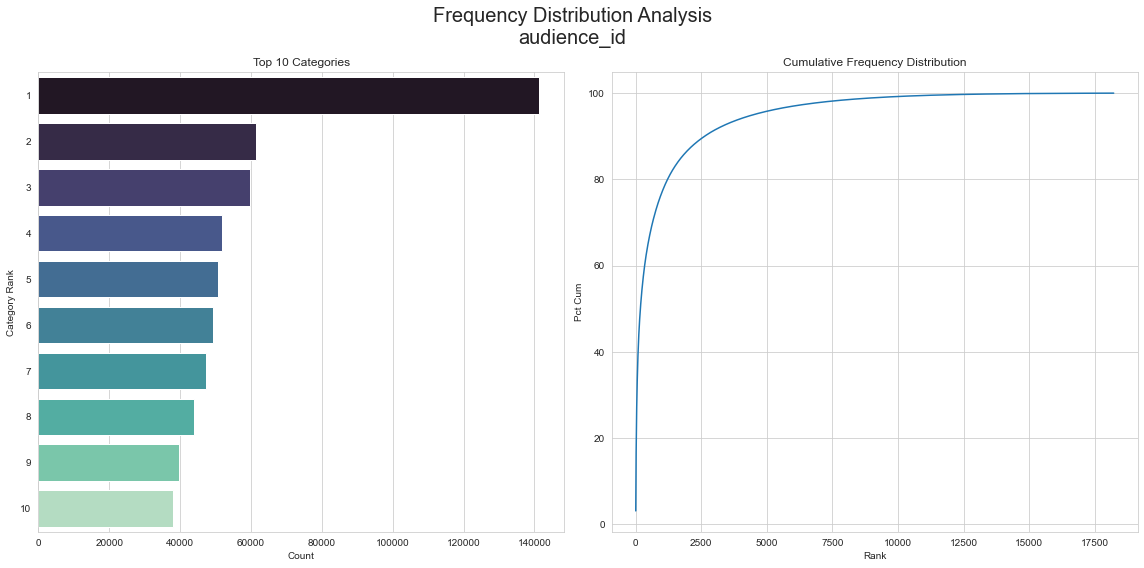

In [15]:
dataset.frequency_analysis(column='audience_id')

### Product Gender



                              Frequency Analysis:                               
                                 product_gender                                 
                              ____________________                              


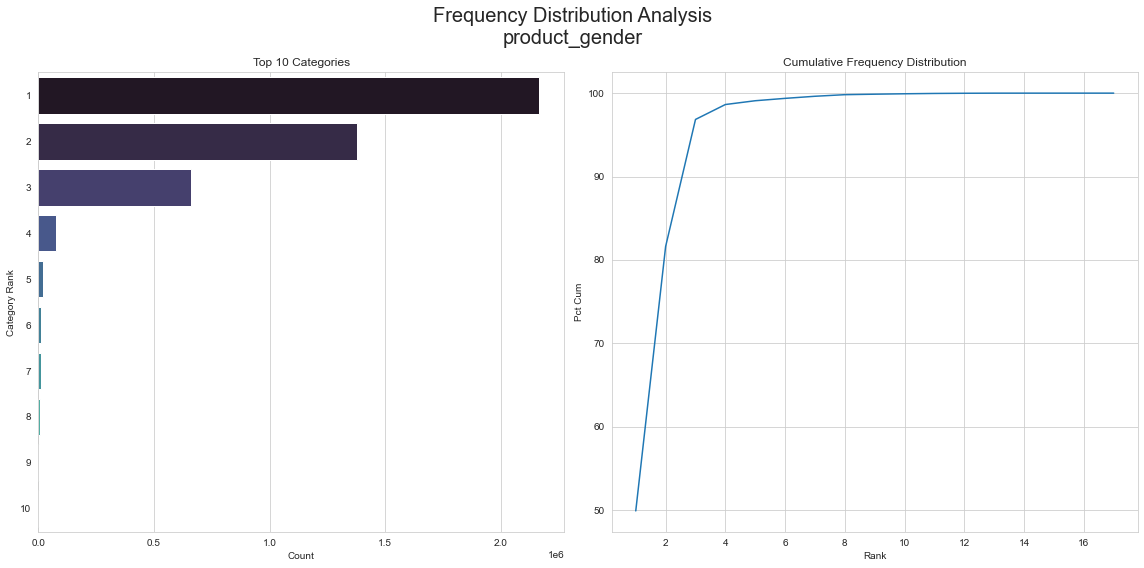

In [16]:
dataset.frequency_analysis(column='product_gender')

### Product Brand



                              Frequency Analysis:                               
                                 product_brand                                  
                              ____________________                              


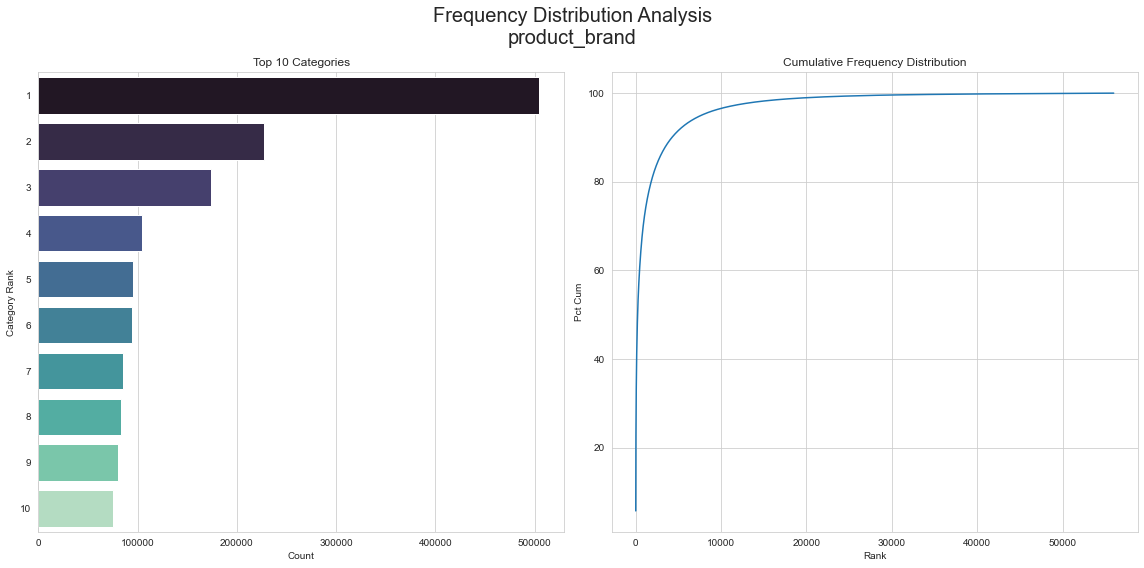

In [17]:
dataset.frequency_analysis(column='product_brand')

### Product Category 1



                              Frequency Analysis:                               
                               product_category_1                               
                              ____________________                              


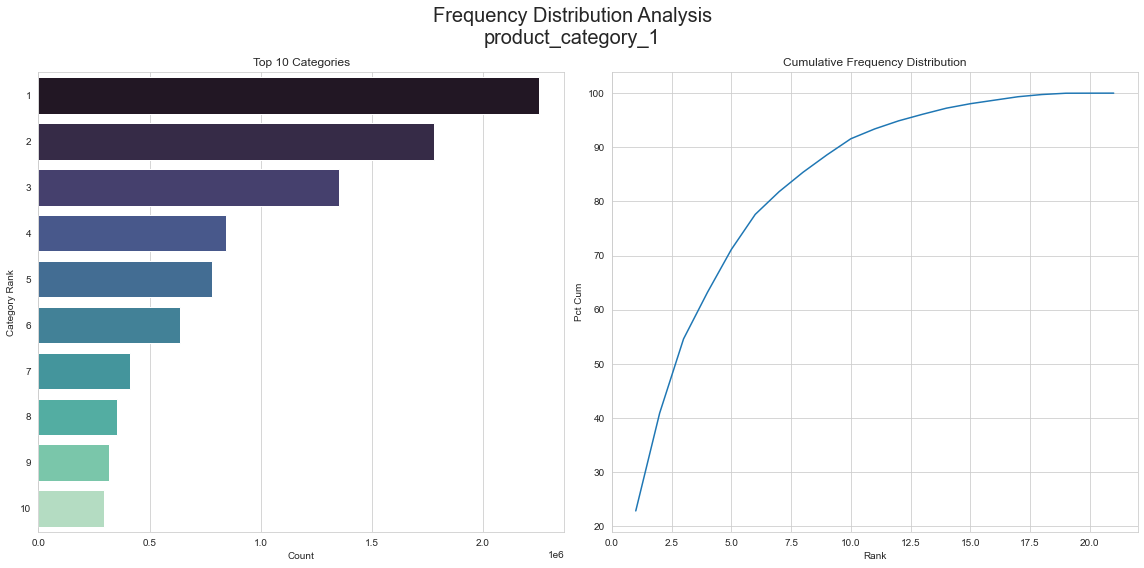

In [18]:
dataset.frequency_analysis(column='product_category_1')

### Product Category 2



                              Frequency Analysis:                               
                               product_category_2                               
                              ____________________                              


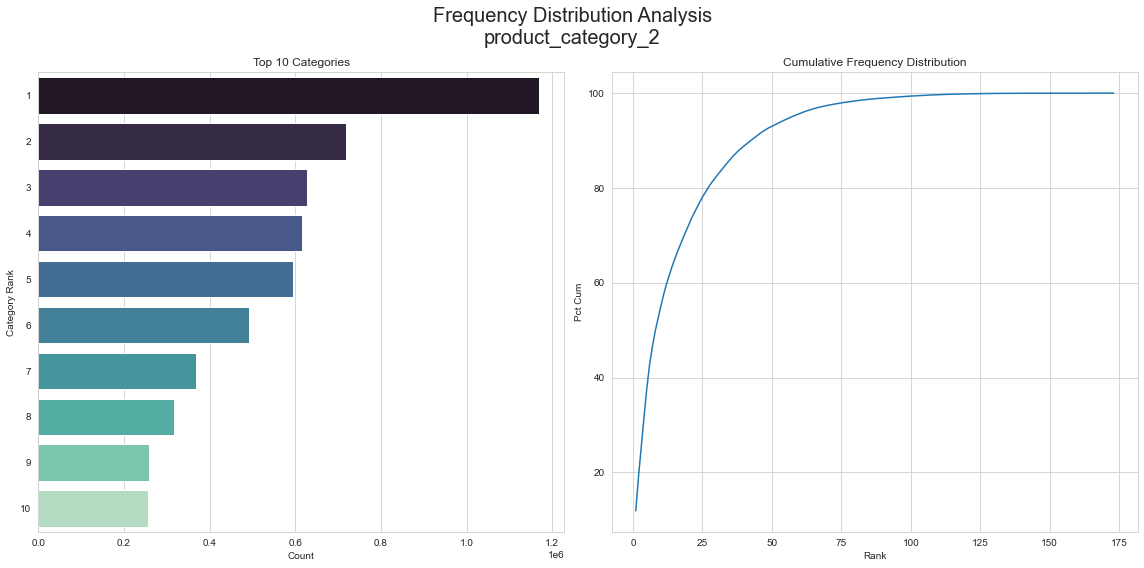

In [19]:
dataset.frequency_analysis(column='product_category_2')

### Product Category 3



                              Frequency Analysis:                               
                               product_category_3                               
                              ____________________                              


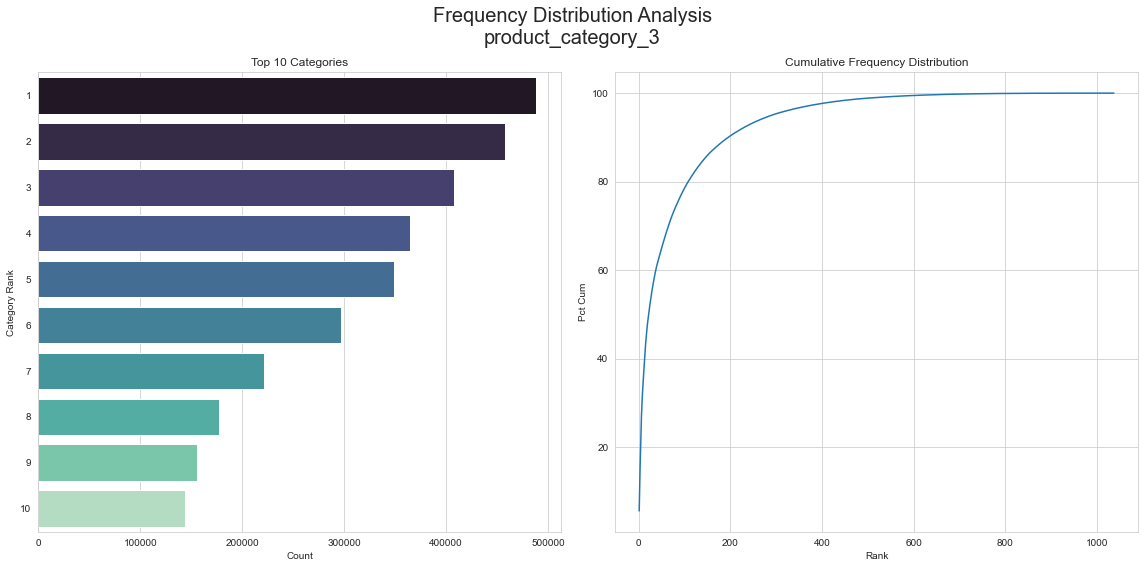

In [20]:
dataset.frequency_analysis(column='product_category_3')

### Product Category 4



                              Frequency Analysis:                               
                               product_category_4                               
                              ____________________                              


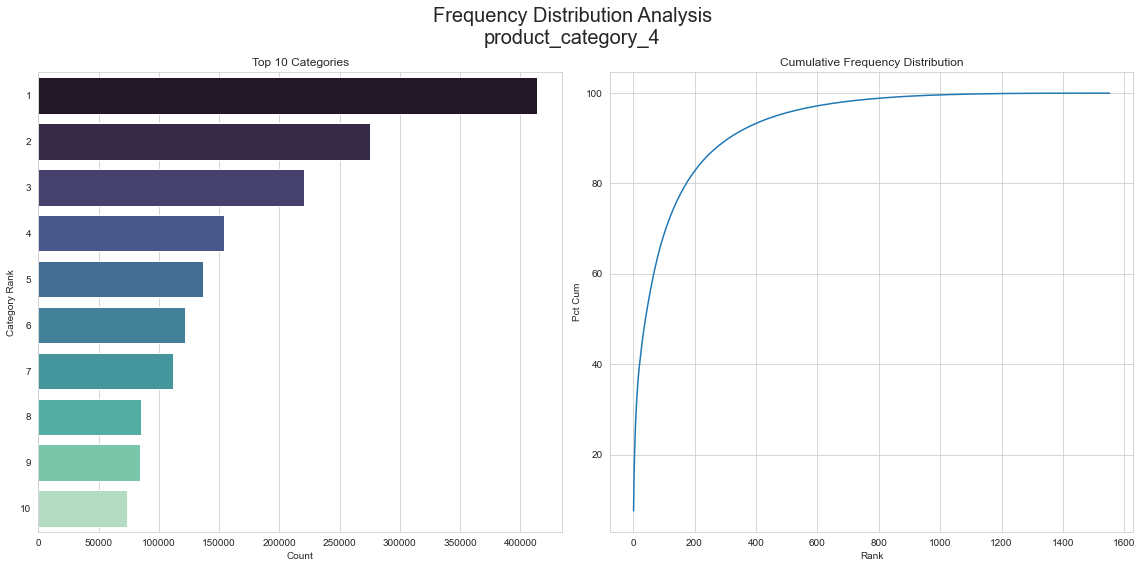

In [21]:
dataset.frequency_analysis(column='product_category_4')

### Product Category 5



                              Frequency Analysis:                               
                               product_category_5                               
                              ____________________                              


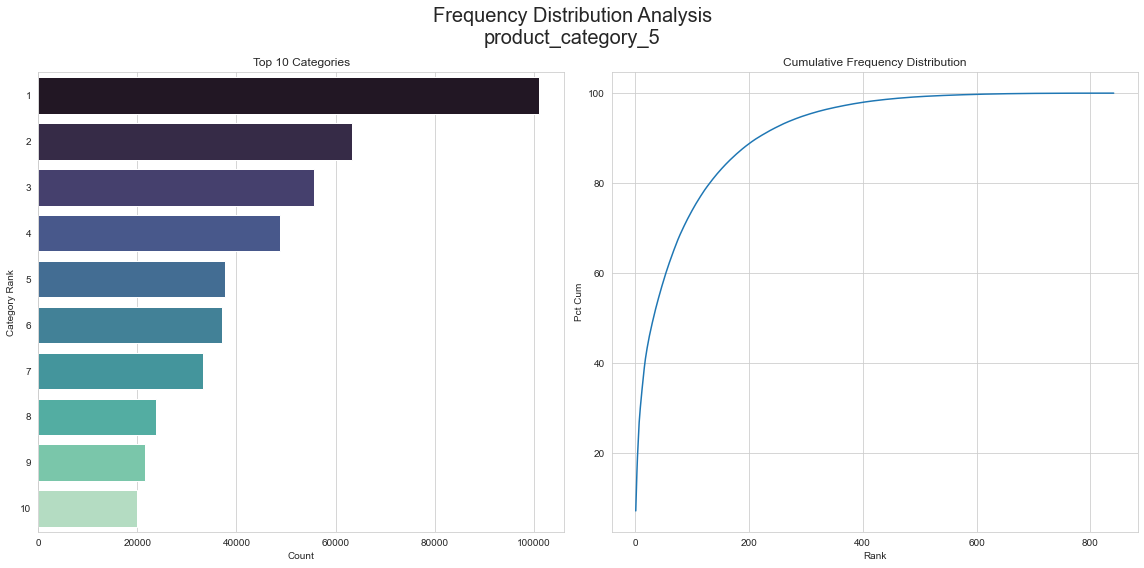

In [22]:
dataset.frequency_analysis(column='product_category_5')

### Product Category 6



                              Frequency Analysis:                               
                               product_category_6                               
                              ____________________                              


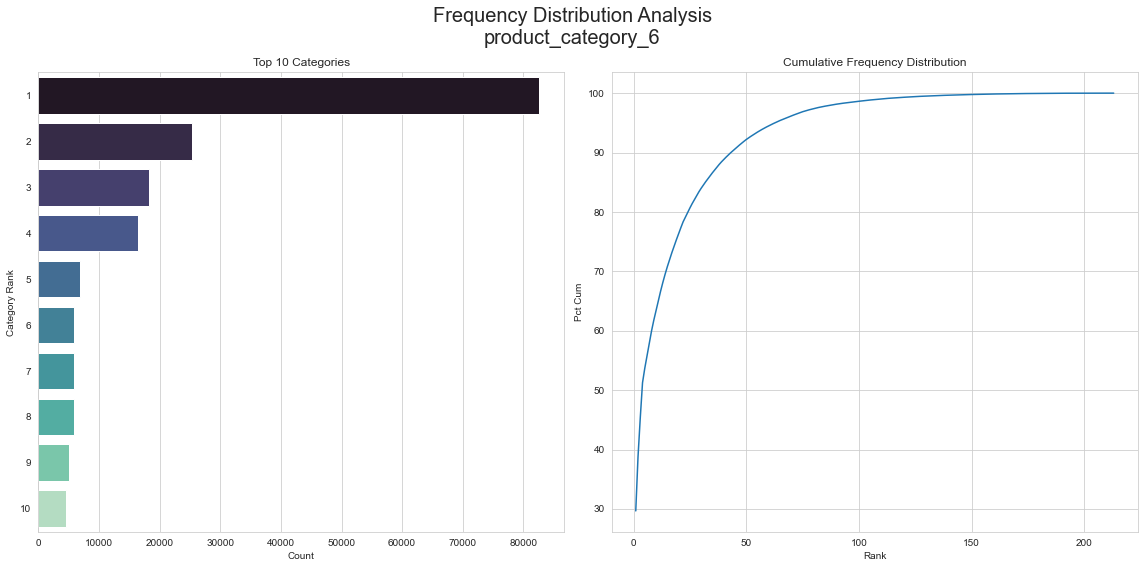

In [23]:
dataset.frequency_analysis(column='product_category_6')

### Product Category 7



                              Frequency Analysis:                               
                               product_category_7                               
                              ____________________                              


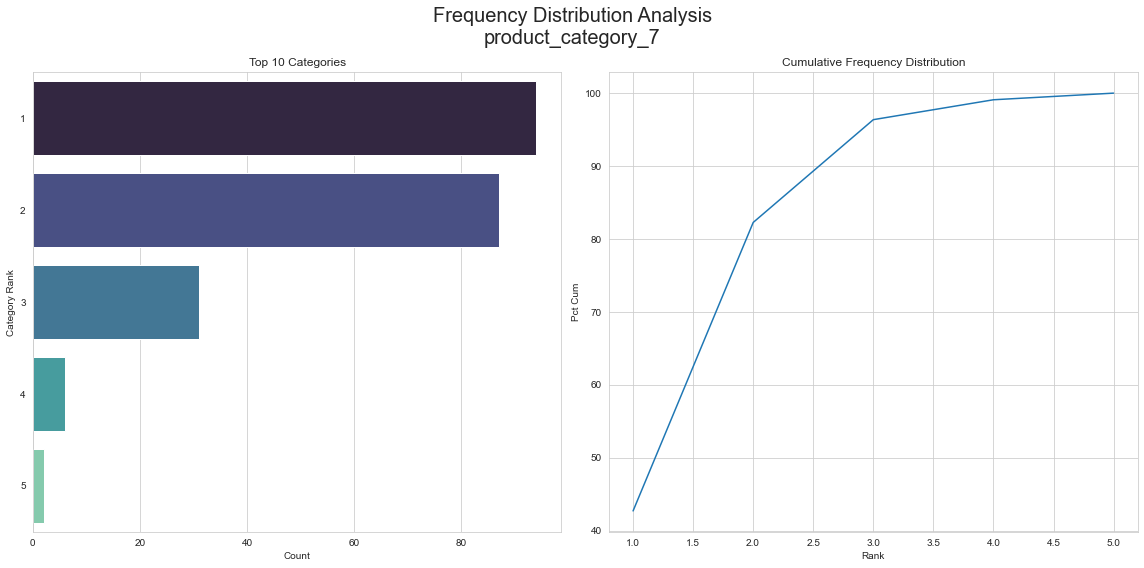

In [24]:
dataset.frequency_analysis(column='product_category_7')

### Product Country



                              Frequency Analysis:                               
                                product_country                                 
                              ____________________                              


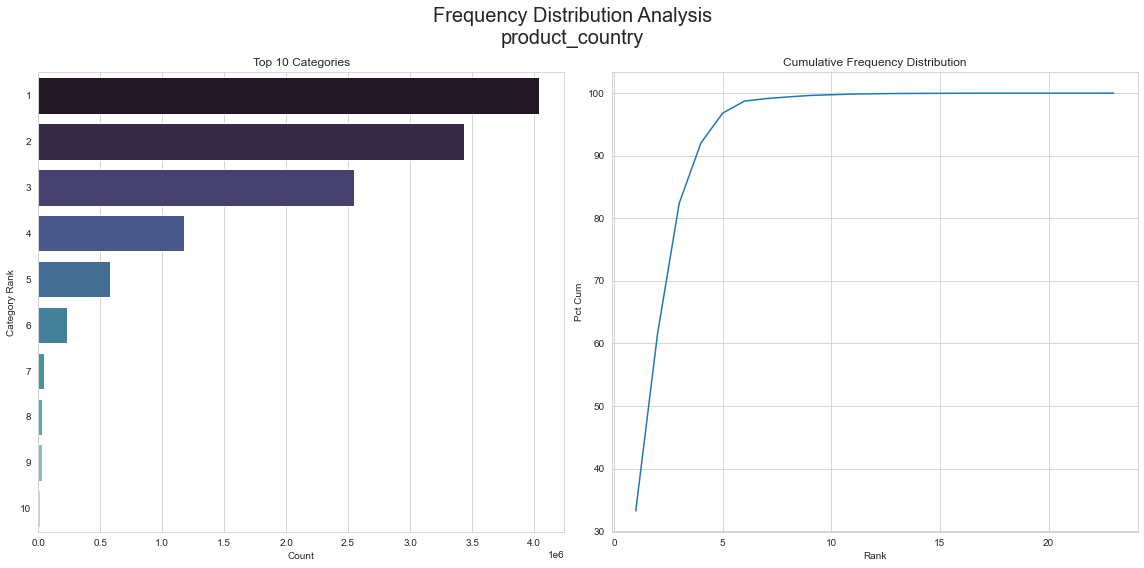

In [25]:
dataset.frequency_analysis(column='product_country')

### Product Id



                              Frequency Analysis:                               
                                   product_id                                   
                              ____________________                              


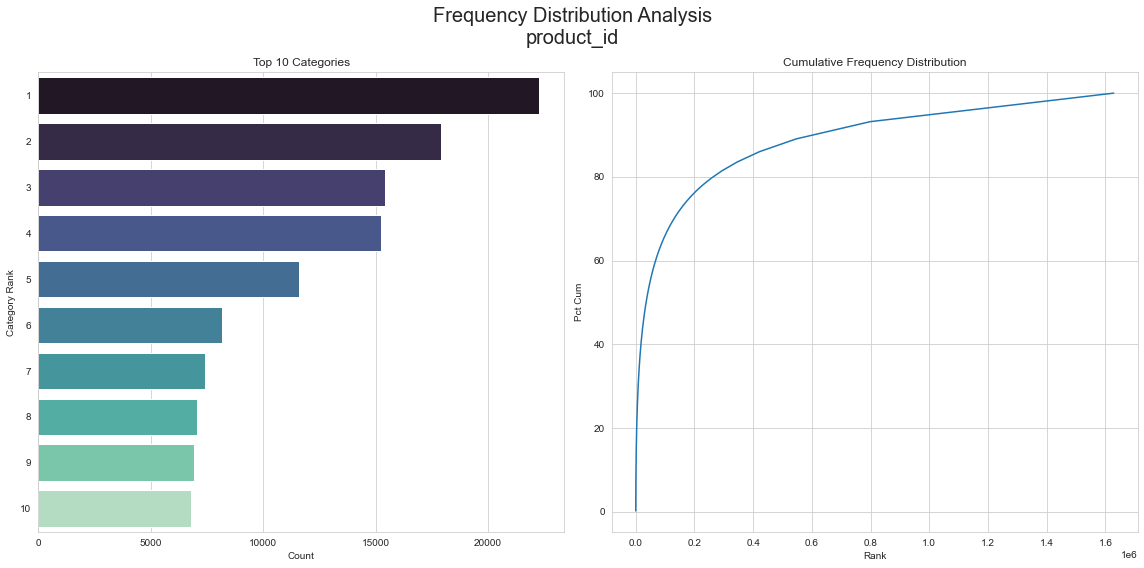

In [26]:
dataset.frequency_analysis(column='product_id')

### Partner Id



                              Frequency Analysis:                               
                                   partner_id                                   
                              ____________________                              


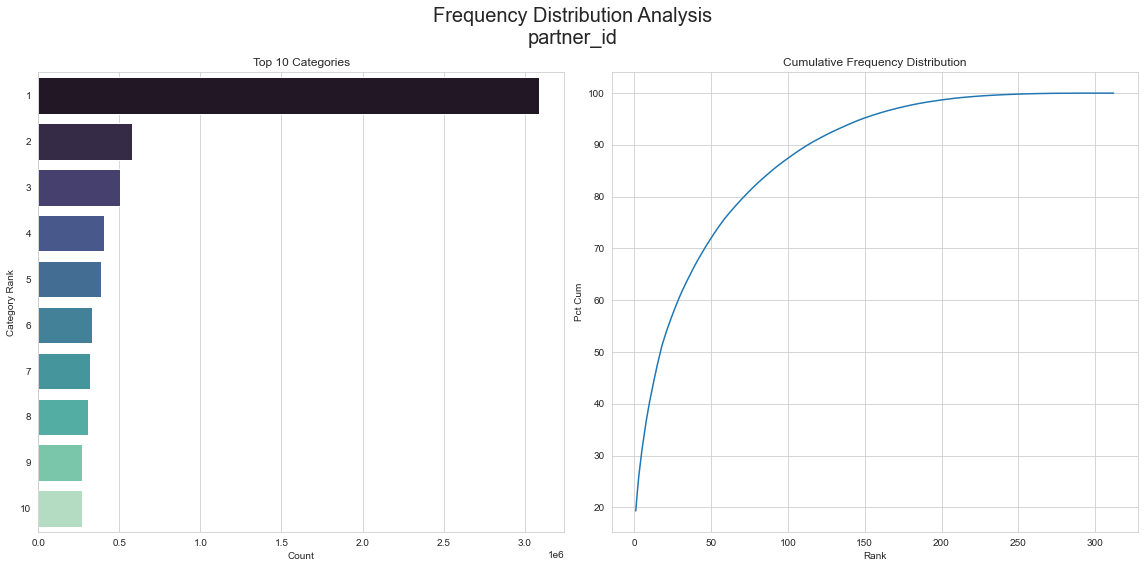

In [27]:
dataset.frequency_analysis(column='partner_id')